In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [3]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data[data.isnull().any(axis=1)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [5]:
df = data.copy()
x = df.iloc[:,df.columns != 'DEATH_EVENT']
y = df['DEATH_EVENT']

Split the data

In [6]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Train the Model

Decision Tree

In [7]:
clf = DecisionTreeClassifier(max_leaf_nodes=10,criterion='entropy',random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Perceptron

In [8]:
pt = Perceptron(random_state=0)
pt.fit(X_train,y_train)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Logistic Regression

In [9]:
lg = LogisticRegression(C=1,random_state=0)
lg.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction

In [10]:
clf_prediction = clf.predict(X_test)
pt_prediction = pt.predict(X_test)
lg_prediction = lg.predict(X_test)

## Score

In [11]:
print("DecisionTreeClassifier Score: ",accuracy_score(y_test,clf_prediction))
print("Perceptron Score: ",accuracy_score(y_test,pt_prediction))
print("LogisticRegression Score: ",accuracy_score(y_test,lg_prediction))

DecisionTreeClassifier Score:  0.85
Perceptron Score:  0.6166666666666667
LogisticRegression Score:  0.7333333333333333


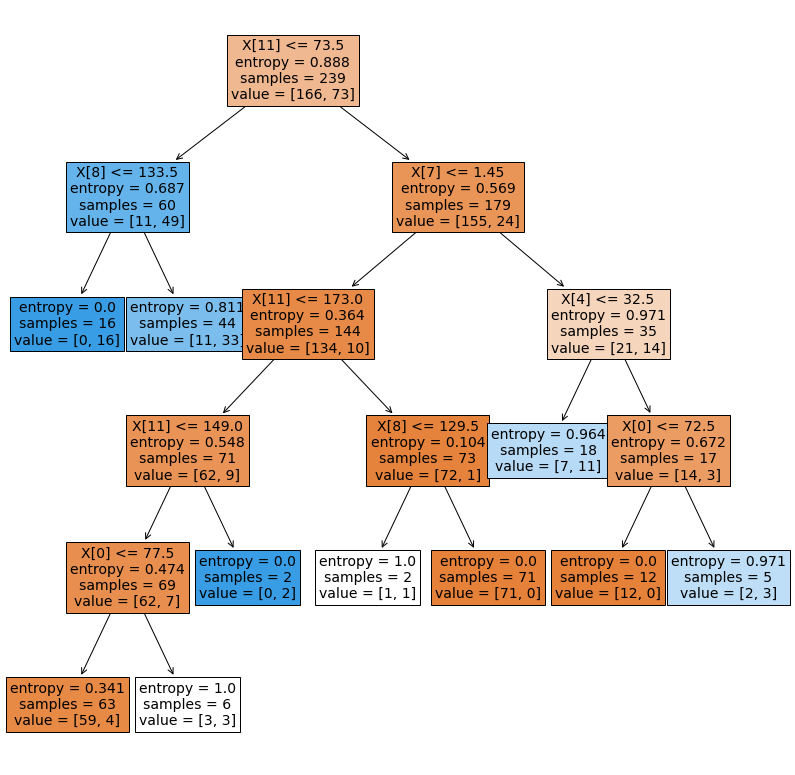

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))
tree.plot_tree(clf,fontsize=(14),filled=True)
plt.show()